In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import time
import pdb
from scipy import stats
import functions_SK_RG as fcn


ModuleNotFoundError: No module named 'functions_SK_RG'

Define a discrete space of rectangles (hypothesis) and examples (data). 1 sample data.

In [ ]:
l=10; # size of the board
x=range(1,l-1); # x: 1,...,l-2 Left side of the rect.
y=range(1,l-1); # y: 1,...,l-2 Bottom of the rect

H_space=[];
for i in x:
    for j in y:
        for w in range(2,l-i+1):
            for h in range(2,l-j+1):                                
                H_space.append((i,j,w,h))

Examples=[];
for i in range(0,l+2):
    for j in range(0,l+2):
        Examples.append((i,j));
        
M=np.zeros([len(Examples),len(H_space)]);
for i in range(0,len(Examples)): # if the sample is consistent with the hypothesis M_sample,hyp=1
    e=Examples[i];
    for j in range(0,len(H_space)):
        h=H_space[j];
        if not (e[0]<h[0] or e[0]>(h[0]+h[2]) or e[1]<h[1] or e[1]>(h[1]+h[3])): # e must be a circle
            M[i,j]=1;
            
#        if (e[0]<h[0] or e[0]>(h[0]+h[2]) or e[1]<h[1] or e[1]>(h[1]+h[3])): # e must be cross
#            M[i,j]=1;
                                    
L=M[:]
T=M[:]
eL=[]
eT=[]
L_uniform=M/np.tile(np.sum(M,axis=1).reshape((M.shape[0],1)),(1,M.shape[1]));
T_uniform=M/np.tile(np.sum(M,axis=0).reshape((1,M.shape[1])),(M.shape[0],1));
L_uniform[np.isnan(L_uniform)]=0
T_uniform[np.isnan(T_uniform)]=0
hL=np.zeros(L.shape[0])
hT=np.zeros(T.shape[1])
for k in range(0,100):
    print(k)    
    hL0=hL
    hT0=hT
    
    T=L/np.tile(np.sum(L,axis=0).reshape((1,L.shape[1])),(L.shape[0],1));
    T[np.isnan(T)]=0;
    L=T/np.tile(np.sum(T,axis=1).reshape((T.shape[0],1)),(1,T.shape[1]));
    L[np.isnan(L)]=0;
        
    
    Aux=np.multiply(L_uniform,np.log(L))
    Aux[np.isnan(Aux)]=0
    hL=-np.sum(Aux,axis=1)
    
    eL.append(np.mean(-np.sum(Aux,axis=1)))

    Aux=np.multiply(T_uniform,np.log(T))
    Aux[np.isnan(Aux)]=0
    eT.append(np.mean(-np.sum(Aux,axis=0)))
        
    if k>5 and np.multiply(hL-hL0,1/hL0)    
        
        
    if k>5 and (eT[-1]-eT[-2])/eT[-2] < 0.001 and (eL[-1]-eL[-2])/eL[-2] < 0.001:
        break
    
plt.clf()
plt.figure();
plt.semilogy(eL)                
plt.semilogy(eT,'r')
plt.show()




PLOT MOST LIKELY PAIR OF SAMPLES

In [ ]:
h_idx=100;
print(np.max(T[:,h_idx]))
idx=np.where(T[:,h_idx]==np.max(T[:,h_idx]));
idx=np.array(idx).flatten()

h=H_space[h_idx];


col=['k','g','y','m','c']
plt.figure()
plt.clf()
for i in idx:
    plt.plot([h[0],h[1],h[1],h[0],h[0]],[h[2],h[2],h[3],h[3],h[2]],'b')
    ex_idx=Examples_pair_idx[i];
    plt.plot(Examples[ex_idx[0]][0]+0.5,Examples[ex_idx[0]][1]+0.5,'k*')
    plt.plot(Examples[ex_idx[1]][0]+0.5,Examples[ex_idx[1]][1]+0.5,'k*')
    plt.show()
    
    

    
    

'''
np.sum(T==np.max(T))

plt.hist(T[:,10].reshape((T.shape[0],1)))
plt.show()
a=np.array([[1,6],[3,4]])


a=a[:,1]
indices = np.where(a == np.max(a))
#print(a)
#print(indices)
'''


In [2]:
def define_hyp_and_examples_space(l,*n_ex):
    
    #l=12; # size of the board
    #n_ex: number of simultaneous examples (one or two)
    

    
    if not any(n_ex):
        n_ex=1 # default number of examples=1
    else:
        n_ex=n_ex[0]
    
    
    X_left=range(1,l-3); # x: 1,...,l-4 Left side of the rect.
    Y_bott=range(1,l-3); # y: 1,...,l-4 Bottom of the rect
    x_max=l-1; # max value of x_right
    y_max=l-1; # max value of y_top
    H_space=[];
    for xl in X_left:
        for yb in Y_bott:
            for xr in range(xl+3,x_max+1):
                for yt in range(yb+3,y_max+1):                                
                    H_space.append((xl,xr,yb,yt))
                            
    
    if n_ex==1:
        Examples=[];
        for i in range(0,l):
            for j in range(0,l):
                Examples.append((i,j)); # CIRCLES: elements 0...(l**2)-1
        for i in range(0,l): # CROSSES: elements l**2...2*(l**2)-1
            for j in range(0,l):
                Examples.append((i,j));    
                        
        M=np.zeros([len(Examples),len(H_space)],dtype=bool);
        ne=-1;
        for i in range(0,l**2): # if the sample is consistent with the hypothesis M(sample,hyp)=1        
            e1=Examples[i];                        
            ne+=1;
            for k in range(0,len(H_space)):
                h=H_space[k];
                if not (e1[0]<h[0] or e1[0]>=h[1] or e1[1]<h[2] or e1[1]>=h[3]): # CIRCLES INSIDE
                    M[ne,k]=1;
        for i in range(l**2,2*(l**2)):
            e1=Examples[i];                        
            ne+=1;
            for k in range(0,len(H_space)):
                h=H_space[k];
                if (e1[0]<h[0] or e1[0]>=h[1] or e1[1]<h[2] or e1[1]>=h[3]): # CROSSES OUTSIDE
                    M[ne,k]=1;                    
                    
            
    if n_ex==2:        
        Examples=[];
        for i in range(0,l):
            for j in range(0,l):
                Examples.append((i,j)); # CIRCLES: elements 0...(l**2)-1
        
        M=np.zeros([int(len(Examples)*(len(Examples)-1)*0.5),len(H_space)],dtype=bool);
        ne=-1;
        Examples_pair_idx=[];
        for i in range(0,len(Examples)-1): # if the sample is consistent with the hypothesis M(sample,hyp)=1        
            e1=Examples[i];
            for j in range(i+1,len(Examples)):
                e2=Examples[j];
                ne+=1;
                Examples_pair_idx.append((i,j)); # indices of the pair of examples in the list Examples
                for k in range(0,len(H_space)):
                    h=H_space[k];
                    if not (e1[0]<h[0] or e1[0]>=h[1] or e1[1]<h[2] or e1[1]>=h[3])\
                    and not (e2[0]<h[0] or e2[0]>=h[1] or e2[1]<h[2] or e2[1]>=h[3]): # e1 and e2 must be circles
                        M[ne,k]=1;

    return M,Examples,H_space
            
#############################################################################
#############################################################################

def get_L_T(M):
            
    L=np.copy(M)
    T=np.copy(M)
    L=L.astype(float)
    T=T.astype(float)
    
    L_uniform=M/np.tile(np.sum(M,axis=1).reshape((M.shape[0],1)),(1,M.shape[1]));
    T_uniform=M/np.tile(np.sum(M,axis=0).reshape((1,M.shape[1])),(M.shape[0],1));
    L_uniform[np.isnan(L_uniform)]=0
    T_uniform[np.isnan(T_uniform)]=0    
    hL=np.zeros(L.shape[0])
    hT=np.zeros(T.shape[1])

    

    nzr=np.any(M,axis=1) # rows with at least 1 non-zero
    nzc=np.any(M,axis=0) # cols with at least 1 non-zero    
    
    for k in range(0,1000):
        #L0=L[:]
        #T0=T[:]
        #t0=time.time()
        hL0=np.copy(hL)
        hT0=np.copy(hT)

        L[nzr,:]=T[nzr,:]/np.tile(np.sum(T[nzr,:],axis=1).reshape((np.sum(nzr),1)),(1,T.shape[1]))
        T[:,nzc]=L[:,nzc]/np.tile(np.sum(L[:,nzc],axis=0).reshape((1,np.sum(nzc))),(L.shape[0],1))
        
        
        '''
        L1=T1/np.tile(np.sum(T1,axis=1).reshape((T1.shape[0],1)),(1,T1.shape[1]));    
        L1[np.isnan(L1)]=0;                                
        T1=L1/np.tile(np.sum(L1,axis=0).reshape((1,L1.shape[1])),(L1.shape[0],1));                    
        T1[np.isnan(T1)]=0;        
        '''

        # Error in approximating L by L_uniform and T by T_uniform: (Cross entropy between L0 and L, averaged across data samples; between T0 and T, averaged across haypotheses)
        Aux=np.multiply(L_uniform,np.log(L))
        Aux[np.isnan(Aux)]=0
        hL=-np.sum(Aux,axis=1)
        eL=np.abs( (hL[nzr]-hL0[nzr])/hL0[nzr])
        eL[np.isnan(eL)]=0

    #    eL.append(np.mean(-np.sum(Aux,axis=1)))

        logT=np.copy(T)
        logT[T>0]=np.log(T[T>0])
        Aux=np.multiply(T_uniform,logT)
        hT=-np.sum(Aux,axis=0)
        eT=np.abs( (hT-hT0)/hT0)
        eT[np.isnan(eT)]=0

        logL=np.copy(L)
        logL[L>0]=np.log(L[L>0])
        Aux=np.multiply(L_uniform,logL)
        hL=-np.sum(Aux,axis=1)
        eL=np.abs( (hL-hL0)/hL0)
        eL[np.isnan(eL)]=0        
        
        
        if k>5 and ((eL<0.0001).all()) and ((eT<0.0001).all()):        
            break
    
    return L,T,eL,eT

#############################################################################
#############################################################################

def plot_trial(h,samples,circle,board_size,**kwargs):
    plt.clf()
    plt.figure()            

    probability_map=[];
    
    if kwargs is not None:
        if 'last_guess' in kwargs.keys():
            last_guess=kwargs['last_guess']
        if 'probability_map' in kwargs.keys():
            probability_map=kwargs['probability_map']
        
        
    if any(probability_map):
        probability_map=np.squeeze(probability_map)        
        in_plus_out=probability_map[0:board_size**2].reshape(board_size,board_size)+probability_map[board_size**2:2*board_size**2].reshape(board_size,board_size)        
        plt.pcolormesh(in_plus_out.transpose())
        print(in_plus_out.transpose())
        #plt.pcolormesh(probability_map[0:board_size**2].reshape(board_size,board_size)+probability_map[board_size**2:2*board_size**2].reshape(board_size,board_size))
        plt.colorbar()
        #plt.pcolor(probability_map['Examples_space'],probability_map['Probabilities'])        
    plt.plot([h[0],h[1],h[1],h[0],h[0]],[h[2],h[2],h[3],h[3],h[2]],'b')
    
    if 'last_guess' in kwargs.keys():
        plt.plot([last_guess[0],last_guess[1],last_guess[1],last_guess[0],last_guess[0]],[last_guess[2],last_guess[2],last_guess[3],last_guess[3],last_guess[2]],'r')
    
    j=-1
    for e in samples:
        j+=1
        if circle[j]:
            plt.plot(e[0]+0.5,e[1]+0.5,'ko')        
        else:
            plt.plot(e[0]+0.5,e[1]+0.5,'kx')        
            
    e=samples[-1]
    if circle[-1]:
        plt.plot(e[0]+0.5,e[1]+0.5,'wo')                
    else:
        plt.plot(e[0]+0.5,e[1]+0.5,'wx')                
    
    plt.xlim([0,board_size])
    plt.ylim([0,board_size])
    plt.show()
    
    
    

SIMMULTAION: GIVEN A HYPOTHESIS SELECT THE BEST EXAMPLE UNTIL THE LEARNER FINDS IT

0) Define M: the binary matrix of posible combinations of samples (circles and crosses) and hypothesis. Get L* and T* by S-K iteration process.

1) Given the true hypothesis, draw a sample d_0 from T*.

2) Given the new sample update M: Multiply all the other rows by the d_0 row, and get M(d_0+d,h). Replace the d_0 row by zeros (That sample is no longer elegible). Replace the conjugate-sample row by zeros (if d_0 was a circle, the cross in the same position). Get L* and T* by S-K iteration.

3) Draw a hypothesis h_0 from L*. If it is correct, finish the process. If it is wrong, replace the column of h_0 in M by zeros.

4) Update M, L* and T*. 

5) Repeat 1-4.






/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


Learner Entropy: 0.00810784467881 CI: 0.00565411266355
[[ 0.00539894  0.00539894  0.00539894  0.00539894  0.00539894  0.00539894
   0.00539894  0.00539894  0.00539894  0.00539894]
 [ 0.00539894  0.08501983  0.04265558  0.02998789  0.00682092  0.00682092
   0.00658437  0.00618131  0.00576503  0.00539894]
 [ 0.00539894  0.04265558  0.02157045  0.01523381  0.00914322  0.00914322
   0.00836273  0.0072014   0.00618131  0.00539894]
 [ 0.00539894  0.02998789  0.01523381  0.01078601  0.01278486  0.01278486
   0.01080977  0.00836273  0.00658437  0.00539894]
 [ 0.00539894  0.0258975   0.01318375  0.00934544  0.01618466  0.01618466
   0.01278486  0.00914322  0.00682092  0.00539894]
 [ 0.00539894  0.00682092  0.00914322  0.01278486  0.01618466  0.01618466
   0.01278486  0.00914322  0.00682092  0.00539894]
 [ 0.00539894  0.00658437  0.00836273  0.01080977  0.01278486  0.01278486
   0.01080977  0.00836273  0.00658437  0.00539894]
 [ 0.00539894  0.00618131  0.0072014   0.00836273  0.00914322  0.00914

/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in log
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in multiply
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in true_divide
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in true_divide
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in true_divide
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in true_divide


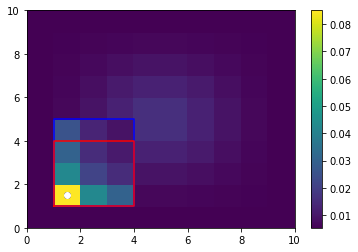

Learner Entropy: 0.00364445348465 CI: 0.00678435296742
[[ 0.00683819  0.00683819  0.00683819  0.00683819  0.00683819  0.00683819
   0.00683819  0.00683819  0.00683819  0.00683819]
 [ 0.00683819  0.          0.00683819  0.00683819  0.04653442  0.02000145
   0.01272516  0.00948265  0.00776015  0.00683819]
 [ 0.00683819  0.00683819  0.00683819  0.00683819  0.04653442  0.02000145
   0.01272516  0.00948265  0.00776015  0.00683819]
 [ 0.00683819  0.00683819  0.00683819  0.00683819  0.04653442  0.02000145
   0.01272516  0.00948265  0.00776015  0.00683819]
 [ 0.00683819  0.00801616  0.00801616  0.00801616  0.02326721  0.0149062
   0.01097165  0.00880952  0.00754045  0.00683819]
 [ 0.00683819  0.02000145  0.02000145  0.02000145  0.0149062   0.01160883
   0.00952746  0.00818518  0.00732633  0.00683819]
 [ 0.00683819  0.01272516  0.01272516  0.01272516  0.01097165  0.00952746
   0.00844801  0.0076713   0.0071425   0.00683819]
 [ 0.00683819  0.00948265  0.00948265  0.00948265  0.00880952  0.008185

/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in true_divide
/home/ahaimovici/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:128: RuntimeWarning: invalid value encountered in true_divide


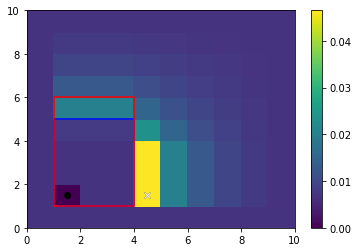

Learner Entropy: -0.0 CI: 0.00301973181855
[[ 0.00813378  0.00813378  0.00813378  0.00813378  0.00813378  0.00813378
   0.00813378  0.00813378  0.00813378  0.00813378]
 [ 0.00813378  0.          0.00813378  0.00813378  0.          0.00813378
   0.00813378  0.00813378  0.00813378  0.00813378]
 [ 0.00813378  0.00813378  0.00813378  0.00813378  0.00813378  0.00813378
   0.00813378  0.00813378  0.00813378  0.00813378]
 [ 0.00813378  0.00813378  0.00813378  0.00813378  0.00813378  0.00813378
   0.00813378  0.00813378  0.00813378  0.00813378]
 [ 0.00813378  0.00813378  0.00813378  0.00813378  0.00813378  0.00813378
   0.00813378  0.00813378  0.00813378  0.00813378]
 [ 0.00813378  0.03636335  0.03636335  0.03636335  0.00813378  0.00813378
   0.00813378  0.00813378  0.00813378  0.00813378]
 [ 0.00813378  0.03636335  0.03636335  0.03636335  0.00813378  0.00813378
   0.00813378  0.00813378  0.00813378  0.00813378]
 [ 0.00813378  0.01665092  0.01665092  0.01665092  0.00813378  0.00813378
   0.008

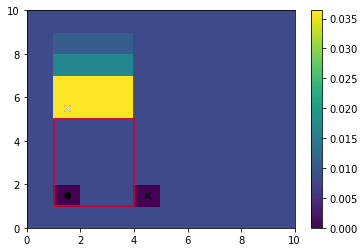

Win at: 2


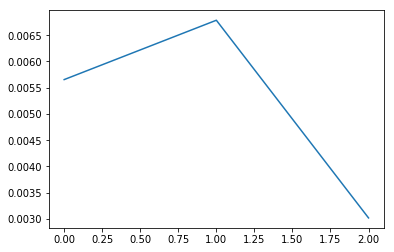

In [3]:
board_size=10
M, Examples_space,H_space=define_hyp_and_examples_space(board_size)
L,T,_,_ =get_L_T(M)    

#ipdb.set_trace()

samples=[]
circle=[]
guesses=[]

CI=[]# cooperative index

h_idx=1

for it in range(0,10):
    
    CI.append(np.sum(np.multiply(L,T))/len(H_space))
    
    # DRAW SAMPLE FROM SAMPLE DISTRIBUTION GIVEN HYPOTHESIS
    '''
    xk = np.arange(len(Examples_space))
    pk = T[:,h_idx]
    custm = stats.rv_discrete(name='custm', values=(xk, pk))
    i_sample = custm.rvs(size=1)[0]
    

    xk = np.arange(len(H_space))
    pk = L[i_sample,:]
    custm = stats.rv_discrete(name='custm', values=(xk, pk))
    i_guess = custm.rvs(size=1)[0]
    '''
    
    i_sample=np.argmax(T[:,h_idx]) # OPTIMAL SAMPLE GIVEN THE HYPOTHESIS    
    i_guess=np.argmax(L[i_sample,:]) # OPTIMAL SAMPLE GIVEN THE HYPOTHESIS
    
    samples.append(Examples_space[i_sample])
    guesses.append(H_space[i_guess])
    if i_sample<board_size**2:
        circle.append(True)
    else:
        circle.append(False)
    
    p=L[i_sample,np.nonzero(L[i_sample,:])]
    HL=-np.sum(np.log(p)*p)/len(H_space) 
    print('Learner Entropy:',HL,'CI:',CI[-1])
        
#    plot_trial(H_space[h_idx],samples,board_size=board_size,probabilities_map=T[:,h_idx],last_guess=H_space[i_guess])
    plot_trial(H_space[h_idx],samples,circle,board_size,probability_map=T[:,h_idx],last_guess=H_space[i_guess])    
    
    if i_guess==h_idx:
        print('Win at:',it)
        break
    
    
    for j in range(0,M.shape[0]):        
        M[j,:]=np.multiply(M[j,:],M[i_sample,:])
            
    M[i_sample,:]=0
    if i_sample< board_size**2:
        M[i_sample+board_size**2,:]=0 # remove the conjugate sample row
    else:
        M[i_sample-board_size**2,:]=0 # remove the conjugate sample row
                        
    M[:,i_guess]=0
            
    L,T,_,_ =get_L_T(M)    
                
plt.plot(CI)
plt.show()



In [5]:
T[:,h_idx]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00813378,  0.00813378,  0.00813378,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00813378,  0.00813378,  0.00813378,  0.00813378,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00813378,  0.00813378,  0.00813378,  0.00813378,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
if 'hola' in kw.keys():
    print('si')

In [ ]:


M=np.array([[0,0,0,0],
   [1,0,1,1],
   [1,0,0,0],
   [0,0,0,0]])

L,T,_,_ =get_L_T(M)    





'''
L_uniform=M/np.tile(np.sum(M,axis=1).reshape((M.shape[0],1)),(1,M.shape[1]));
T_uniform=M/np.tile(np.sum(M,axis=0).reshape((1,M.shape[1])),(M.shape[0],1));
L_uniform[np.isnan(L_uniform)]=0
'''
'''
L=np.copy(M)
T=np.copy(M)
L=L.astype(float)
T=T.astype(float)
L1=np.copy(L)
T1=np.copy(T)
'''        

#L[nzr,:]=T[nzr,:]/np.tile(np.sum(T[nzr,:],axis=1).reshape((np.sum(nzr),1)),(1,T.shape[1]))
#T[:,nzc]=L[:,nzc]/np.tile(np.sum(L[:,nzc],axis=0).reshape((1,np.sum(nzc))),(L.shape[0],1))



In [ ]:
print('M')
print(M)
print('L')
print(L)
print('T')
print(T)

In [ ]:
len(H_space)

In [ ]:
a=np.random.rand(2,3)
print(a)
a.transpose()
print(a.transpose())

In [ ]:
p[0][1]*np.log(p[0][1])